About this notebook: Perform linear regression to predict house prices.

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

### Tags: Regression, Principal Component Analysis, Data Visualization, Linear Regression, Feature Scaling, Cross-Validation, Training, Testing, Mean Squared Error, R-Squared Metric

In [1]:
# Import Dependencies

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
#Load the dataset 
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
#View first 5 samples
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
#Get quick stats summary
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
#View correlations
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [6]:
#CHAS does not seem important since it is not strongly correlated to any other feature
df1 = df.drop(['CHAS'], axis=1)

### Data Visualization

/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


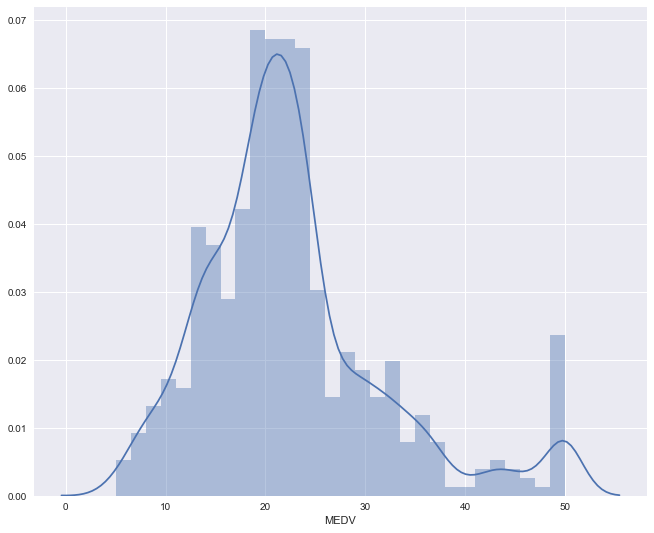

In [7]:
#Set the size of the figure
sns.set(rc={'figure.figsize':(11,9)})

#Plot a histogram showing the distribution of the target values
sns.distplot(df1['MEDV'], bins=30)

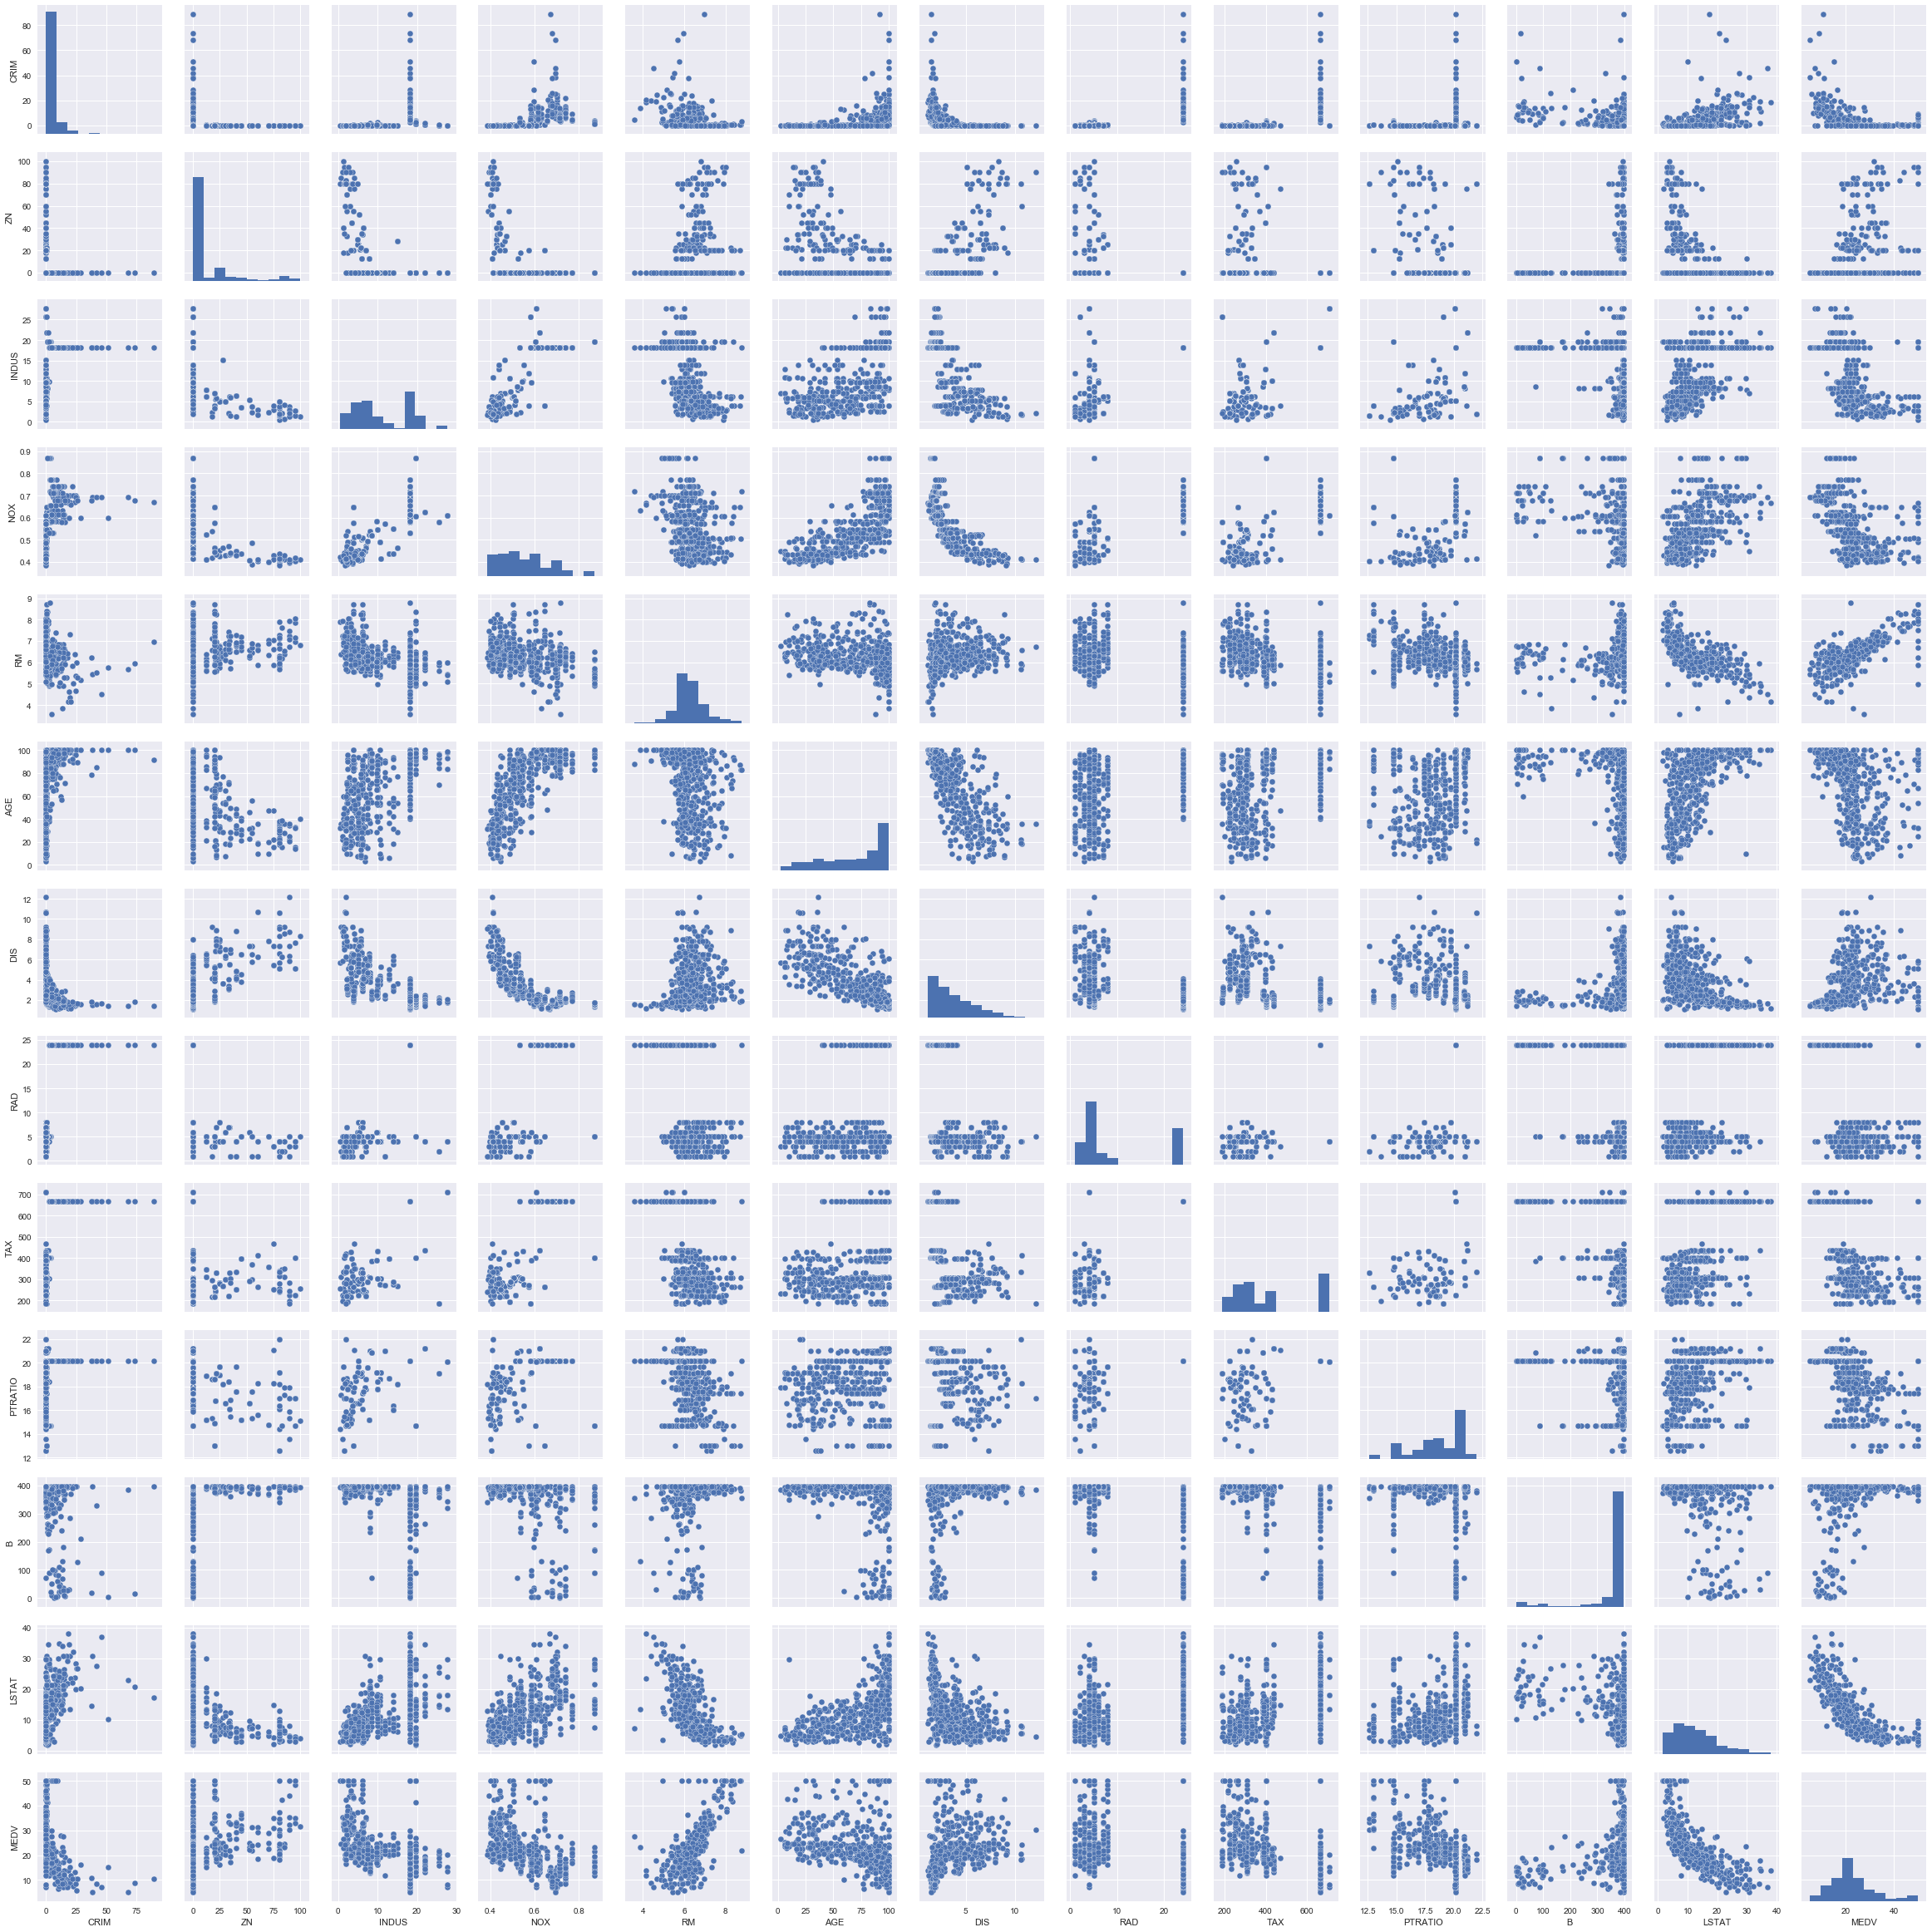

In [8]:
#View pairplots
sns.pairplot(df1)

In [9]:
#Compute the pair wise correlation for all columns  
correlation_matrix = df1.corr().round(2)

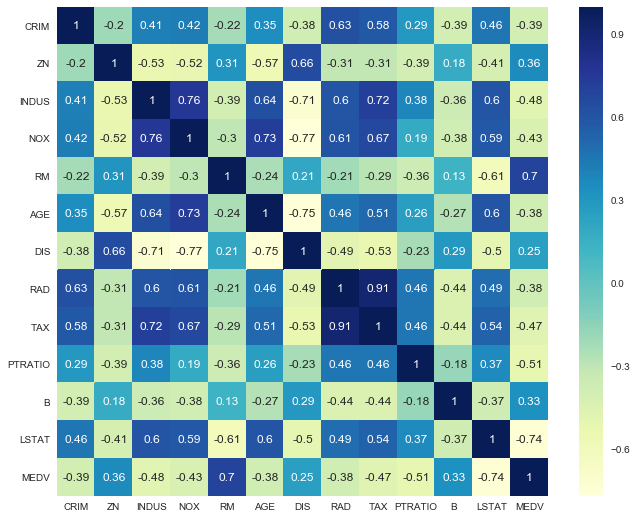

In [10]:
#Use the heatmap function from seaborn to plot the correlation matrix
#Annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap="YlGnBu")

In [11]:
#Define features as input X
X = df1.iloc[:, 0:12] 

In [12]:
#Calculate % of outliers
for k, v in df1.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]        
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df1)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [13]:
#View input features
X

CRIM    ZN  INDUS    NOX     RM    AGE     DIS  RAD    TAX  PTRATIO  \
0     0.00632  18.0   2.31  0.538  6.575   65.2  4.0900    1  296.0     15.3   
1     0.02731   0.0   7.07  0.469  6.421   78.9  4.9671    2  242.0     17.8   
2     0.02729   0.0   7.07  0.469  7.185   61.1  4.9671    2  242.0     17.8   
3     0.03237   0.0   2.18  0.458  6.998   45.8  6.0622    3  222.0     18.7   
4     0.06905   0.0   2.18  0.458  7.147   54.2  6.0622    3  222.0     18.7   
5     0.02985   0.0   2.18  0.458  6.430   58.7  6.0622    3  222.0     18.7   
6     0.08829  12.5   7.87  0.524  6.012   66.6  5.5605    5  311.0     15.2   
7     0.14455  12.5   7.87  0.524  6.172   96.1  5.9505    5  311.0     15.2   
8     0.21124  12.5   7.87  0.524  5.631  100.0  6.0821    5  311.0     15.2   
9     0.17004  12.5   7.87  0.524  6.004   85.9  6.5921    5  311.0     15.2   
10    0.22489  12.5   7.87  0.524  6.377   94.3  6.3467    5  311.0     15.2   
11    0.11747  12.5   7.87  0.524  6.009   82.9  6.2267    5  311.0     15.2   
12    0.09378  12.5   7.87  0.524  5.889   39.0  5.4509    5  311.0     15.2   
13    0.62976   0.0   8.14  0.538  5.949   61.8  4.7075    4  307.0     21.0   
14    0.63796   0.0   8.14  0.538  6.096   84.5  4.4619    4  307.0     21.0   
15    0.62739   0.0   8.14  0.538  5.834   56.5  4.4986    4  307.0     21.0   
16    1.05393   0.0   8.14  0.538  5.935   29.3  4.4986    4  307.0     21.0   
17    0.78420   0.0   8.14  0.538  5.990   81.7  4.2579    4  307.0     21.0   
18    0.80271   0.0   8.14  0.538  5.456   36.6  3.7965    4  307.0     21.0   
19    0.72580   0.0   8.14  0.538  5.727   69.5  3.7965    4  307.0     21.0   
20    1.25179   0.0   8.14  0.538  5.570   98.1  3.7979    4  307.0     21.0   
21    0.85204   0.0   8.14  0.538  5.965   89.2  4.0123    4  307.0     21.0   
22    1.23247   0.0   8.14  0.538  6.142   91.7  3.9769    4  307.0     21.0   
23    0.98843   0.0   8.14  0.538  5.813  100.0  4.0952    4  307.0     21.0   
24    0.75026   0.0   8.14  0.538  5.924   94.1  4.3996    4  307.0     21.0   
25    0.84054   0.0   8.14  0.538  5.599   85.7  4.4546    4  307.0     21.0   
26    0.67191   0.0   8.14  0.538  5.813   90.3  4.6820    4  307.0     21.0   
27    0.95577   0.0   8.14  0.538  6.047   88.8  4.4534    4  307.0     21.0   
28    0.77299   0.0   8.14  0.538  6.495   94.4  4.4547    4  307.0     21.0   
29    1.00245   0.0   8.14  0.538  6.674   87.3  4.2390    4  307.0     21.0   
..        ...   ...    ...    ...    ...    ...     ...  ...    ...      ...   
476   4.87141   0.0  18.10  0.614  6.484   93.6  2.3053   24  666.0     20.2   
477  15.02340   0.0  18.10  0.614  5.304   97.3  2.1007   24  666.0     20.2   
478  10.23300   0.0  18.10  0.614  6.185   96.7  2.1705   24  666.0     20.2   
479  14.33370   0.0  18.10  0.614  6.229   88.0  1.9512   24  666.0     20.2   
480   5.82401   0.0  18.10  0.532  6.242   64.7  3.4242   24  666.0     20.2   
481   5.70818   0.0  18.10  0.532  6.750   74.9  3.3317   24  666.0     20.2   
482   5.73116   0.0  18.10  0.532  7.061   77.0  3.4106   24  666.0     20.2   
483   2.81838   0.0  18.10  0.532  5.762   40.3  4.0983   24  666.0     20.2   
484   2.37857   0.0  18.10  0.583  5.871   41.9  3.7240   24  666.0     20.2   
485   3.67367   0.0  18.10  0.583  6.312   51.9  3.9917   24  666.0     20.2   
486   5.69175   0.0  18.10  0.583  6.114   79.8  3.5459   24  666.0     20.2   
487   4.83567   0.0  18.10  0.583  5.905   53.2  3.1523   24  666.0     20.2   
488   0.15086   0.0  27.74  0.609  5.454   92.7  1.8209    4  711.0     20.1   
489   0.18337   0.0  27.74  0.609  5.414   98.3  1.7554    4  711.0     20.1   
490   0.20746   0.0  27.74  0.609  5.093   98.0  1.8226    4  711.0     20.1   
491   0.10574   0.0  27.74  0.609  5.983   98.8  1.8681    4  711.0     20.1   
492   0.11132   0.0  27.74  0.609  5.983   83.5  2.1099    4  711.0     20.1   
493   0.17331   0.0   9.69  0.585  5.707   54.0  2.3817    6  391.0     19.2   
494   0.2

### Scaling features

In [14]:
#Apply min-max scaling to features before applying PCA
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X_scaled = scaler.transform(X)

/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
#View scaled values of features
X_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [16]:
#Define target
Y = df1.iloc[:,-1]

In [17]:
#View target
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### Train-Test Split

In [18]:
#Split the training and test data set
#Assign random_state to any value. This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.33, random_state=5)

print("Shape of Training features: ", X_train.shape)
print("Shape of Test features", X_test.shape)
print("Shape of Training labels", Y_train.shape)
print("Shape of Test labels", Y_test.shape)

Shape of Training features:  (339, 12)
Shape of Test features (167, 12)
Shape of Training labels (339,)
Shape of Test labels (167,)


### Principal Components Analysis

In [19]:
#Fit Principal Component Analysis to the training input
pca = PCA()  
X_train_red = pca.fit_transform(X_train) 

In [20]:
#Observe the variance explained by each of the principal components
#Select the number of components that explain significant variance in the training input
explained_variance = pca.explained_variance_ratio_

In [21]:
print("Explained Variance by Principal Components: ", explained_variance)

Explained Variance by Principal Components:  [0.5884728  0.13163152 0.0718128  0.05314257 0.04001431 0.03731677
 0.02603891 0.01443457 0.01216042 0.00974738 0.00858038 0.00664759]


In [22]:
#Apply PCA now we will retain the first six principal components to preserve 92.23% variance
pca = PCA(n_components=6)
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)
print("PCA Explained Variance Ratio: ", pca.explained_variance_ratio_)

PCA Explained Variance Ratio:  [0.5884728  0.13163152 0.0718128  0.05314257 0.04001431 0.03731677]


### Linear Regression

In [23]:
#Define the model
lin_model = LinearRegression()
lin_model.fit(X_train_red, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### KFold Cross Validation

In [25]:
#Use kFold cross validation to estimate test error using training set
kf = KFold(n_splits=10)
scores = cross_val_score(lin_model, X_train_red, Y_train, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -24.60 (+/- 8.22)


### Model Evaluation

In [26]:
# Model evaluation for training set

y_train_predict = lin_model.predict(X_train_red)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for test set

y_test_predict = lin_model.predict(X_test_red)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.855494242361488
R2 score is 0.7046602421613606


The model performance for testing set
--------------------------------------
RMSE is 5.956328986503687
R2 score is 0.6215447500639963
